In [1]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
# Get stopwords from wordcloud library
import matplotlib.pyplot as plt
df = pd.read_csv("updated_tweet_info.csv")

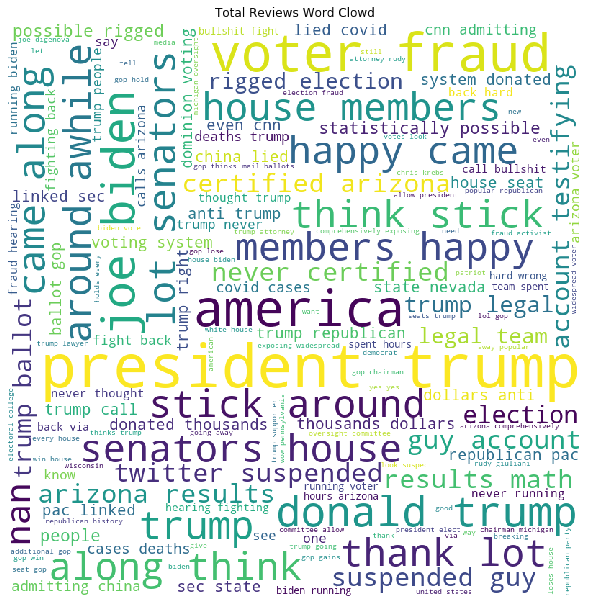

In [2]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.tweet:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Total Reviews Word Clowd')
plt.show() 
    


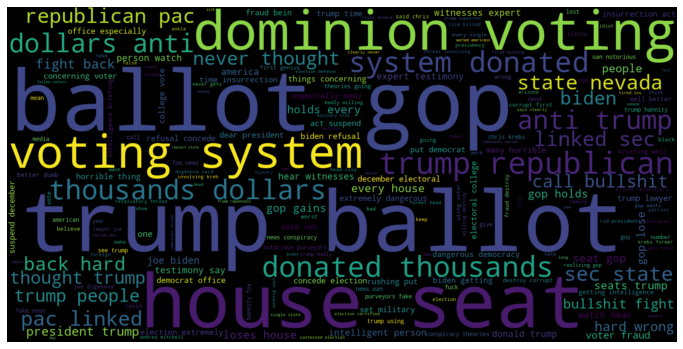

In [3]:
neg_tweets = df[df.clean_polarity == -1]
neg_string = []
for t in neg_tweets.tweet:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

    


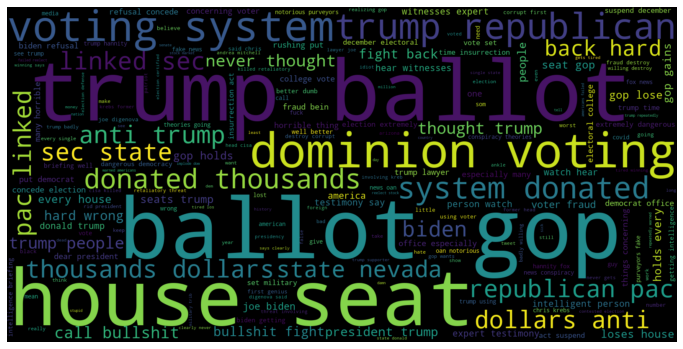

In [4]:
neu_tweets = df[df.clean_polarity == 0]
neu_string = []
for t in neg_tweets.tweet:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

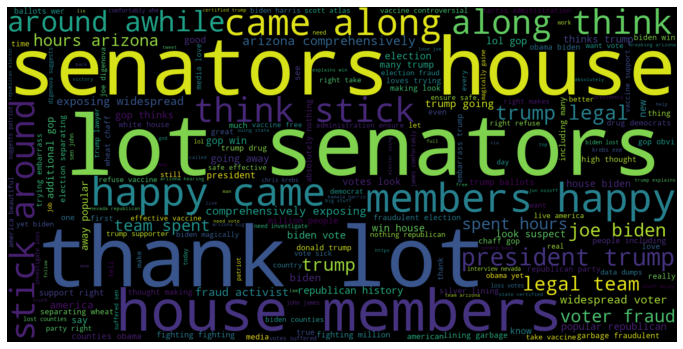

In [5]:
pos_tweets = df[df.clean_polarity == 1]
pos_string = []
for t in pos_tweets.tweet:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

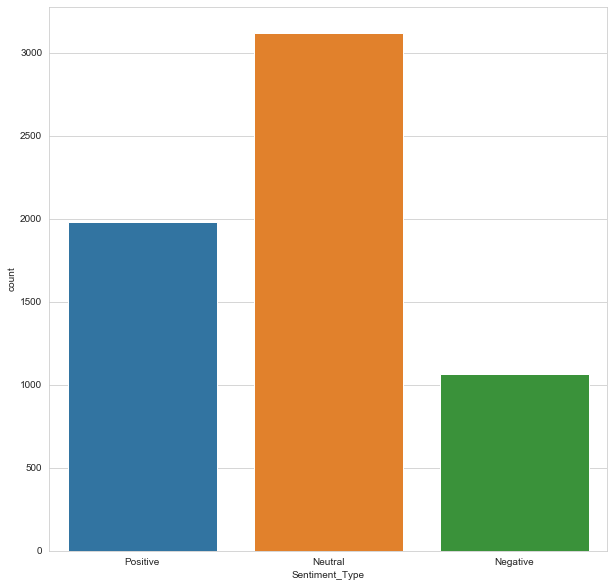

In [6]:
def f(df):
    if df.clean_polarity > 0:
        val = "Positive"
    elif df.clean_polarity == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df['Sentiment_Type'] = df.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df)
